In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

import torchvision.utils as utils
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from sklearn.metrics import confusion_matrix

In [2]:
# CUDA Check
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Set dtype
dtype = torch.double

In [3]:

cifar_train = datasets.CIFAR10(
    root="data/",
    train=True,
    transform=transforms.ToTensor(),
    download=True)

cifar_test = datasets.CIFAR10(
    root="data/",
    train=False,
    transform=transforms.ToTensor(),
    download=True)

print(cifar_train)
print(cifar_test)

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: ToTensor()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original train example # 49453
tensor([[[ 53.,  76.,  57.],
         [ 23.,  42.,  35.],
         [ 37.,  66.,  50.],
         ...,
         [ 29.,  55.,  41.],
         [ 24.,  45.,  31.],
         [ 36.,  75.,  42.]],

        [[ 49.,  77.,  60.],
         [ 27.,  53.,  41.],
         [ 42.,  71.,  53.],
         ...,
         [ 40.,  68.,  52.],
         [ 25.,  49.,  35.],
         [ 26.,  49.,  29.]],

        [[ 48.,  82.,  56.],
         [ 36.,  62.,  42.],
         [ 37.,  65.,  45.],
         ...,
         [ 31.,  56.,  42.],
         [ 24.,  48.,  38.],
         [ 18.,  30.,  23.]],

        ...,

        [[189., 188., 187.],
         [189., 187., 184.],
         [187., 183., 179.],
         ...,
         [154., 145., 130.],
         [160., 149., 132.],
         [156., 146., 129.]],

        [[196., 195., 196.],
         [188., 186., 183.],
         [182., 178., 175.],
         ...,
         [154., 146., 133.],
         [153., 145., 131.],
         [154., 147., 131.]],

     

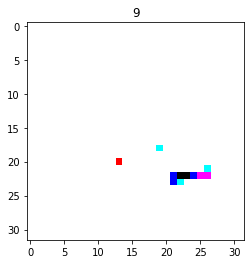

In [4]:
X_train = cifar_train.data
y_train = cifar_train.targets
X_test = cifar_test.data
y_test = cifar_test.targets

X_train=torch.tensor(X_train)
y_train=torch.tensor(y_train)
X_test=torch.tensor(X_test)
y_test=torch.tensor(y_test) #cpu tensor

X_train = X_train.to(dtype=dtype)
X_test = X_test.to(dtype=dtype)

# Data check
idx = np.random.randint(0, X_train.shape[0])
#

print("Original train example # " + str(idx))
print(X_train[idx])

plt.figure()
plt.imshow(X_train[idx], cmap='gray')
plt.title(y_train[idx].item()) #item() 텐서로 부터 값만 가져와
plt.show()

In [5]:
#만약
# name=[
#     'airplane', 
#     'automobile', 
#     'bird', 
#     'cat', 
#     'deer', 
#     'dog', 
#     'frog', 
#     'horse', 
#     'ship',
#     'truck',
    
# ]
# def label_name(label):
#     return name[label]

# Function to normalize with minimax normalizer
def normalize(data, min_value, max_value):
    return (data - min_value) / (max_value - min_value)

# Calculate vector size from shape
def calculate_vector_size(shape): # (= 32 * 32)
    v = 1
    for s in shape:
        v *= s
    return v

# Shuffle the dataset
def shuffle(X, y):
    idx = np.random.permutation(y.size(0))
    shuffled_X = X[idx]
    shuffled_y = y[idx]
    
    return shuffled_X, shuffled_y

# Reshape the dataset to vector
def vectorize(X):
    shape = X.shape[1:]
    vectorized_X = X.view(-1, calculate_vector_size(shape))
    return vectorized_X
# Show the image from tensor object
def show_image(img, label):
    plt.figure()
    plt.imshow(img.cpu().numpy(), cmap="gray") #
    plt.title(label.item())
    plt.show()

tensor([[[0.0235, 0.0353, 0.0157],
         [0.0314, 0.0392, 0.0196],
         [0.0353, 0.0471, 0.0157],
         ...,
         [0.0431, 0.0745, 0.0235],
         [0.0314, 0.0431, 0.0314],
         [0.0157, 0.0196, 0.0196]],

        [[0.0431, 0.0627, 0.0392],
         [0.0431, 0.0627, 0.0392],
         [0.0471, 0.0588, 0.0314],
         ...,
         [0.0353, 0.0784, 0.0314],
         [0.0235, 0.0314, 0.0275],
         [0.0314, 0.0353, 0.0431]],

        [[0.0824, 0.0980, 0.0549],
         [0.0784, 0.0980, 0.0510],
         [0.0824, 0.0941, 0.0510],
         ...,
         [0.0431, 0.0745, 0.0353],
         [0.0196, 0.0431, 0.0196],
         [0.0275, 0.0431, 0.0431]],

        ...,

        [[0.2078, 0.2235, 0.1961],
         [0.2275, 0.1961, 0.1176],
         [0.2196, 0.1804, 0.0941],
         ...,
         [0.5843, 0.5725, 0.6000],
         [0.6510, 0.6431, 0.6549],
         [0.6824, 0.6784, 0.6824]],

        [[0.2157, 0.1843, 0.1059],
         [0.1922, 0.1608, 0.0824],
         [0.

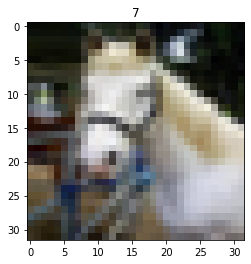

Data shape :  torch.Size([32, 32, 3])
torch.Size([50000, 32, 32, 3])


In [6]:
# Normalize the data
X_train = normalize(X_train, 0, 255)
X_test = normalize(X_test, 0, 255)

# Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

# Check a example in train dataset
idx = np.random.randint(0, y_train.size(0)) #0에서부터 y_train.size만큼랜덤 수 생성
print(X_train[idx])

print("Normalized example # ", str(idx))
show_image(X_train[idx], y_train[idx])

# Check a example shape
shape = X_train.shape[1:] #
print("Data shape : ", shape)

print(X_train.shape)

# Reshape the data
X_train = vectorize(X_train)
X_test = vectorize(X_test)

In [7]:
learning_rate = 0.1
training_epochs = 70
display_step = 5
batch_size = 100

D_in = calculate_vector_size(shape) # (= 32 * 32)
H = 100
D_out = 10

In [8]:
# Initialize model parameters
def initialize_parameters(model): #->nn 초기화
    for p in model.parameters():
        if (p.dim() > 1): #2이상이면 MATRIX 
            torch.nn.init.xavier_normal_(p)
        else:
            torch.nn.init.uniform_(p, 0.1, 0.2) #0.1~0.2 사이의 숫자 찍어내기

In [9]:
class MLP(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(MLP, self).__init__()
        self.linear1 = torch.nn.Linear(in_features=D_in, out_features=H, bias=True)
        self.activation1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(in_features=H, out_features=H, bias=True)
        self.activation2 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(in_features=H, out_features=D_out, bias=True)
    
    def forward(self, x):
        output = self.linear1(x)
        output = self.activation1(output)
        output = self.linear2(output)
        output = self.activation2(output)
        output = self.linear3(output)
        return output
    


batch train data example shape :  torch.Size([100, 3, 32, 32])
batch test data example shape :  torch.Size([100, 3, 32, 32])


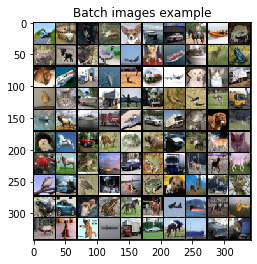

In [10]:
# Show image of batch data
def show_grid_image(img, title): #이미지를 배치 단위로 가져올건데, 이를 보여주는-
    # Show image of the batch data
    n_img = img.shape[0] 
    
    # Arguments
    # img : batch image tensor
    # title : title of the image
    
    # Hint!
    # torchvision.utils.make_grid()
    # Reference : https://pytorch.org/docs/stable/torchvision/utils.html?highlight=utils%20make_grid#torchvision.utils.make_grid

    img = utils.make_grid(img.cpu().detach(), nrow = int(np.ceil(np.sqrt(n_img)))) #row 사이즈를 얼마나 할 것인지? 이미지에 루트 씌운 후 100->10
    
    np_img = img.numpy()
    
    plt.figure()
    plt.imshow(np.transpose(np_img, (1, 2, 0)), cmap='gray')
    plt.title(title)
    plt.show()
    
# 원래 데이터응 볼 때는 
batch_size=100 #위에서 이미 해줬지만, 내가 전체 걸 보고 싶다고 한 부분이 저장되어서 이렇게 또 해준 것임
#batch_size=y_train.size(0)

# WARNING! this dataloader returns CPU tensor NOT GPU tensor
#Hint! You can use next(iter()) to extract the next element of iterator
train_data_loader = torch.utils.data.DataLoader(cifar_train, batch_size, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(cifar_test, batch_size, shuffle=True)

batch_train_data_example, batch_train_label_example = next(iter(train_data_loader))
batch_test_data_example, batch_test_label_example = next(iter(test_data_loader))
print("batch train data example shape : ", batch_train_data_example.shape)
print("batch test data example shape : ", batch_test_data_example.shape)

show_grid_image(batch_train_data_example, "Batch images example")

In [11]:
model = MLP(D_in, H, D_out).to(dtype=dtype, device=device)
criterion = torch.nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

batch_losses = []
losses = []
accuracies = []


initialize_parameters(model)

print("Training...")

for epoch in range(training_epochs):
    avg_loss = 0
    
    for data in train_data_loader:
        # Extract images and labels from data
        images, labels = data
#         images=images.to(device=device)
#         labels=labels.to(device=device)
        # Reshpae data(100,1,28,28)->(100,784)
        images = images.view(-1, D_in)
        
        # Convert data to cuda tensor
        images = images.to(dtype=dtype, device=device) #실수를 사용하고 싶어서
        labels = labels.to(device=device)
        
        # Initialize optimizer
        optimizer.zero_grad()
        
        # Calculate model outputs and loss
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Record the batch loss and calculate epoch average loss
        batch_losses.append(loss.item())
        avg_loss += loss.item() / labels.size(0)#labels.size(0)은 한 배치 사이즈
        # 딱 떨어지게 하기 위해 -> 1000개가 있을 때 128개로 나누다 보면 마지막은 128개가 아니게 됳 거니까
        
        # Calculate loss and update weights
        loss.backward()
        optimizer.step()
    
    # Record the epoch loss
    losses.append(avg_loss)
    
    # Show current loss information
    if (epoch + 1) % display_step == 0:
        print("Epoch " + str(epoch + 1) + " : ", avg_loss)
        
print("Finsh trining")

# Training...
# Epoch 5 :  8.109174545959608
# Epoch 10 :  7.570666101594233
# Epoch 15 :  7.240147993767415
# Epoch 20 :  6.973963257315838
# Epoch 25 :  6.7642632380264
# Epoch 30 :  6.595618109286774
# Finsh trining
# 이런 결과가 나온 이유:

Training...
Epoch 5 :  7.957837082177626
Epoch 10 :  7.350311822865402
Epoch 15 :  7.016201546526006
Epoch 20 :  6.739977176076043
Epoch 25 :  6.53663784387327
Epoch 30 :  6.326501201494204
Epoch 35 :  6.158797819631562
Epoch 40 :  6.027087831174428
Epoch 45 :  5.908083905151837
Epoch 50 :  5.765729987095069
Epoch 55 :  5.651064926562179
Epoch 60 :  5.520198037410532
Epoch 65 :  5.415749907188987
Epoch 70 :  5.309570394192398
Finsh trining


In [12]:
# Check accuracies
# We don't need to calculate gradients during validation time!
with torch.no_grad():
    # Check train accuracy
    train_corrects = 0
    train_total = 0
    
    for data in train_data_loader:
        # Extract images and labels from data
        images, labels = data #배치된 이미지, 배치된 label에대한 정보
        
        # Reshpae data
        images = images.view(-1, D_in)
        
        # Convert data to cuda tensor
        images = images.to(dtype=dtype, device=device)
        labels = labels.to(device=device)
        
        # Check the number of right answer and total answer
        outputs = model(images)
        _, predictions = torch.max(outputs, axis=1)
        train_total += labels.size(0) #labels=batch_size
        train_corrects += (labels == predictions).sum().item()
        
    print("Train accuracy : ", (train_corrects / train_total) * 100, "%")
    
    # Check train accuracy
    test_corrects = 0
    test_total = 0
    
    for data in test_data_loader:
        # Extract images and labels from data
        images, labels = data
        
        # Reshpae data
        images = images.view(-1, D_in)
        
        # Convert data to cuda tensor
        images = images.to(dtype=dtype, device=device)
        labels = labels.to(device=device)
        
        # Check the number of right answer and total answer
        outputs = model(images)
        _, predictions = torch.max(outputs, axis=1)
        test_total += labels.size(0)
        test_corrects += (labels == predictions).sum().item()
        
    print("Test accuracy : ", (test_corrects / test_total) * 100, "%")

Train accuracy :  63.376 %
Test accuracy :  50.14999999999999 %


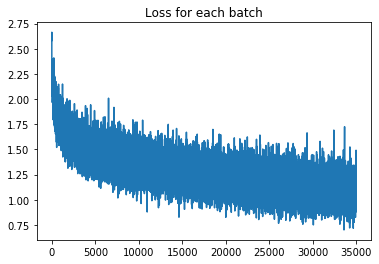

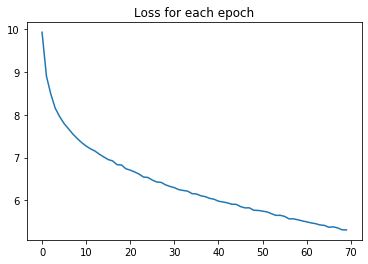

RuntimeError: Expected object of device type cuda but got device type cpu for argument #2 'mat1' in call to _th_addmm

In [13]:
# Plot losses for batch
plt.figure()
plt.plot(batch_losses, label="loss")
plt.title("Loss for each batch")
plt.show()

# Plot losses for epoch
plt.figure()
plt.plot(losses, label="loss")
plt.title("Loss for each epoch")
plt.show()

# Show confusion matrix
with torch.no_grad():
    outputs = model(X_test)
    _, predictions = torch.max(outputs, axis=1)
    predictions_ = predictions.cpu().detach().numpy()
    y_test_ = y_test.cpu().detach().numpy()
    print("Confusion matrix \n", confusion_matrix(y_test_, predictions_))

In [ ]:
batch_losses = []
losses = []
accuracies = []

# Initialize the parameters #??
initialize_parameters(model)

print("Training...")

for epoch in range(training_epochs):
    avg_loss = 0
    
    for data in train_data_loader:
        # Extract images and labels from data
        images, labels = data
        
        # Reshpae data(100,1,28,28)->(100,784)
        images = images.view(-1, D_in)
        
        # Convert data to cuda tensor
        images = images.to(dtype=dtype, device=device) #실수를 사용하고 싶어서
        labels = labels.to(device=device)
        
        # Initialize optimizer
        optimizer.zero_grad()
        
        # Calculate model outputs and loss
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Record the batch loss and calculate epoch average loss
        batch_losses.append(loss.item())
        avg_loss += loss.item() / labels.size(0)#labels.size(0)은 한 배치 사이즈
        # 딱 떨어지게 하기 위해 -> 1000개가 있을 때 128개로 나누다 보면 마지막은 128개가 아니게 됳 거니까
        
        # Calculate loss and update weights
        loss.backward()
        optimizer.step()
    
    # Record the epoch loss
    losses.append(avg_loss)
    
    # Show current loss information
    if (epoch + 1) % display_step == 0:
        print("Epoch " + str(epoch + 1) + " : ", avg_loss)
        
print("Finsh trining")